In [4]:
#titanic dataset preprocessing
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import numpy as np
# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)
%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, precision_recall_curve

plt.rcParams["figure.figsize"] = (12,12)

In [17]:
df = pd.read_csv('newtrain.csv')
df.describe()

#df['diff_A_B'] = df['PassengerId'] - df['PassengerId']



import random
import string


COLS=df.iloc[:,:-1].columns.values
df['two']=2
df['half']=0.5
print(COLS)
for i in range(0,len(COLS)):
    for j in range(i,len(COLS)):
        #nam=''.join(random.choices(string.ascii_uppercase + string.digits, k=10))
        #print(nam.lower())
        #df[nam.lower()]=df[[COLS[i]]]-df[[COLS[j]]]
        df[COLS[i]+'_s_'+COLS[j]]=df.eval(COLS[i]+'/'+COLS[j]).replace([np.inf, -np.inf], np.nan).fillna(0)
        #df[COLS[i]+'.minus.'+COLS[j]]=df.eval(COLS[i]+'-'+COLS[j])
        df[COLS[i]+'_x_'+COLS[j]]=df.eval(COLS[i]+'*'+COLS[j])
        pass

COLS=df.drop('Survived',axis=1).columns.values
print(COLS)
for i in range(0,len(COLS)):
    for j in range(i,len(COLS)):
        pass
        #nam=''.join(random.choices(string.ascii_uppercase + string.digits, k=10))
        #print(nam.lower())
        #df[nam.lower()]=df[[COLS[i]]]-df[[COLS[j]]]
        #df[COLS[i]+'_x_'+COLS[j]]=df.eval(COLS[i]+'*'+COLS[j])
        #df[COLS[i]+'.minus.'+COLS[j]]=df.eval(COLS[i]+'-'+COLS[j])
        #df[COLS[i]+'.plus.'+COLS[j]]=df.eval(COLS[i]+'+'+COLS[j])

    
CLASS=df[['Survived']].values
df=df.drop('Survived',axis=1)
df['Survived']=CLASS
df.columns.values

['PassengerId' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'title']
['PassengerId' 'Pclass' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked' 'title' 'two' 'half' 'PassengerId_s_PassengerId'
 'PassengerId_x_PassengerId' 'PassengerId_s_Pclass' 'PassengerId_x_Pclass'
 'PassengerId_s_Sex' 'PassengerId_x_Sex' 'PassengerId_s_Age'
 'PassengerId_x_Age' 'PassengerId_s_SibSp' 'PassengerId_x_SibSp'
 'PassengerId_s_Parch' 'PassengerId_x_Parch' 'PassengerId_s_Ticket'
 'PassengerId_x_Ticket' 'PassengerId_s_Fare' 'PassengerId_x_Fare'
 'PassengerId_s_Cabin' 'PassengerId_x_Cabin' 'PassengerId_s_Embarked'
 'PassengerId_x_Embarked' 'PassengerId_s_title' 'PassengerId_x_title'
 'Pclass_s_Pclass' 'Pclass_x_Pclass' 'Pclass_s_Sex' 'Pclass_x_Sex'
 'Pclass_s_Age' 'Pclass_x_Age' 'Pclass_s_SibSp' 'Pclass_x_SibSp'
 'Pclass_s_Parch' 'Pclass_x_Parch' 'Pclass_s_Ticket' 'Pclass_x_Ticket'
 'Pclass_s_Fare' 'Pclass_x_Fare' 'Pclass_s_Cabin' 'Pclass_x_Cabin'
 'Pclass_s_Embarked' 

array(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'title', 'two', 'half',
       'PassengerId_s_PassengerId', 'PassengerId_x_PassengerId',
       'PassengerId_s_Pclass', 'PassengerId_x_Pclass',
       'PassengerId_s_Sex', 'PassengerId_x_Sex', 'PassengerId_s_Age',
       'PassengerId_x_Age', 'PassengerId_s_SibSp', 'PassengerId_x_SibSp',
       'PassengerId_s_Parch', 'PassengerId_x_Parch',
       'PassengerId_s_Ticket', 'PassengerId_x_Ticket',
       'PassengerId_s_Fare', 'PassengerId_x_Fare', 'PassengerId_s_Cabin',
       'PassengerId_x_Cabin', 'PassengerId_s_Embarked',
       'PassengerId_x_Embarked', 'PassengerId_s_title',
       'PassengerId_x_title', 'Pclass_s_Pclass', 'Pclass_x_Pclass',
       'Pclass_s_Sex', 'Pclass_x_Sex', 'Pclass_s_Age', 'Pclass_x_Age',
       'Pclass_s_SibSp', 'Pclass_x_SibSp', 'Pclass_s_Parch',
       'Pclass_x_Parch', 'Pclass_s_Ticket', 'Pclass_x_Ticket',
       'Pclass_s_Fare', 'Pclass_x_Fare', 'Pcl

In [18]:
df.iloc[:,:-1].columns.values

array(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'title', 'two', 'half',
       'PassengerId_s_PassengerId', 'PassengerId_x_PassengerId',
       'PassengerId_s_Pclass', 'PassengerId_x_Pclass',
       'PassengerId_s_Sex', 'PassengerId_x_Sex', 'PassengerId_s_Age',
       'PassengerId_x_Age', 'PassengerId_s_SibSp', 'PassengerId_x_SibSp',
       'PassengerId_s_Parch', 'PassengerId_x_Parch',
       'PassengerId_s_Ticket', 'PassengerId_x_Ticket',
       'PassengerId_s_Fare', 'PassengerId_x_Fare', 'PassengerId_s_Cabin',
       'PassengerId_x_Cabin', 'PassengerId_s_Embarked',
       'PassengerId_x_Embarked', 'PassengerId_s_title',
       'PassengerId_x_title', 'Pclass_s_Pclass', 'Pclass_x_Pclass',
       'Pclass_s_Sex', 'Pclass_x_Sex', 'Pclass_s_Age', 'Pclass_x_Age',
       'Pclass_s_SibSp', 'Pclass_x_SibSp', 'Pclass_s_Parch',
       'Pclass_x_Parch', 'Pclass_s_Ticket', 'Pclass_x_Ticket',
       'Pclass_s_Fare', 'Pclass_x_Fare', 'Pcl

In [19]:
def importance(dt):
	X = dt.iloc[:,:-1].values
	Y = dt.iloc[:,-1].values
	
	#~ print(X[:3])
	#~ print(Y[:3])
	
	Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.1, random_state=42)
	
	clf = RandomForestClassifier(n_estimators=50, random_state=0)
	#~ clf = tree.DecisionTreeClassifier(max_depth=10)
	clf.fit(Xtr, Ytr)

	imp = clf.feature_importances_
	col = dt.columns.values
	
	for x in sorted(list(zip(col, imp)),key=lambda x: x[1],reverse=True):
		print(x)
	
	col = [a for a,b in list(sorted(list(zip(col, imp)),key=lambda x: x[1],reverse=False))]
	imp = [b for a,b in list(sorted(list(zip(col, imp)),key=lambda x: x[1],reverse=False))]
	
	plt.title('Feature Importances, RF, score='+str(clf.score(Xte,Yte)))
	plt.barh(col, imp, color='b', align='center')
	plt.xlabel('Relative Importance')

('Sex_x_Age', 0.05917472527279807)
('Sex_x_Cabin', 0.03523861159727597)
('Sex_x_title', 0.03278985299110004)
('Sex_s_title', 0.02968639774802192)
('Sex_x_Ticket', 0.02300430858840205)
('PassengerId_s_Sex', 0.018730641885155087)
('Sex_s_Cabin', 0.015729037210854984)
('Pclass_x_Pclass', 0.014244787219827653)
('Pclass', 0.01418823183182198)
('Sex_s_Sex', 0.013207705916257534)
('Pclass_x_Embarked', 0.013184421959146543)
('Fare_x_Cabin', 0.013023659095610157)
('Pclass_s_Fare', 0.012633225767794536)
('Sex_s_Age', 0.01242834545209778)
('PassengerId_x_Cabin', 0.012354869124007472)
('Sex', 0.011941083239558482)
('Pclass_x_Sex', 0.011827888808428187)
('Fare', 0.011675492311389299)
('Pclass_s_Sex', 0.011660624685989494)
('Fare_x_Fare', 0.010982942929020877)
('PassengerId_s_Pclass', 0.010786050420068395)
('Sex_s_Fare', 0.010308560263035244)
('Sex_x_Fare', 0.010202847273793775)
('PassengerId_x_Pclass', 0.01016919655484532)
('Age_x_Fare', 0.01016852015036873)
('PassengerId_x_PassengerId', 0.01011579

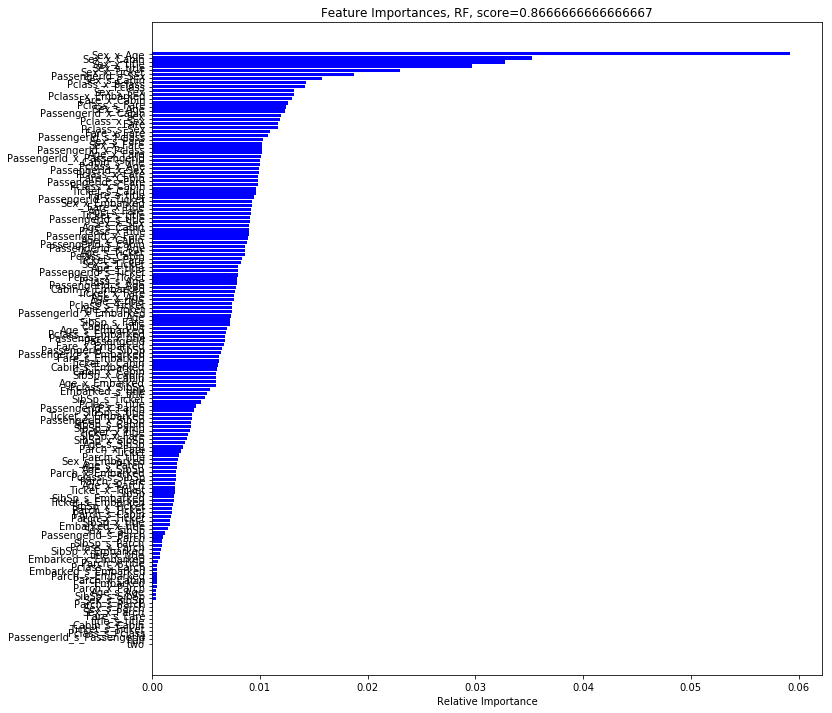

In [20]:
importance(df)

In [140]:
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

def RFE_importance(dt):
	X = dt.iloc[:,:-1].values
	Y = dt.iloc[:,-1].values
	
	#~ print(X[:3])
	#~ print(Y[:3])
	
	Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.1, random_state=42)
	
	clf = RandomForestClassifier(n_estimators=50, random_state=0)
	#~ clf = tree.DecisionTreeClassifier(max_depth=10)
	#~ clf.fit(Xtr, Ytr)
	
	rfe = RFE(estimator=clf, n_features_to_select=1, step=1)
	rfe.fit(X, Y)
	col = dt.columns.values
	imp = (len(rfe.ranking_)+1-np.array(rfe.ranking_))/np.sum(rfe.ranking_)
	
	
	ncol = [a for a,b in list(sorted(list(zip(col, imp)),key=lambda x: x[1],reverse=False))]
	nimp = [b for a,b in list(sorted(list(zip(col, imp)),key=lambda x: x[1],reverse=False))]
	
	plt.title('Feature Importances, RFE')
	plt.barh(ncol, nimp, color='b', align='center')
	plt.xlabel('Relative Importance')

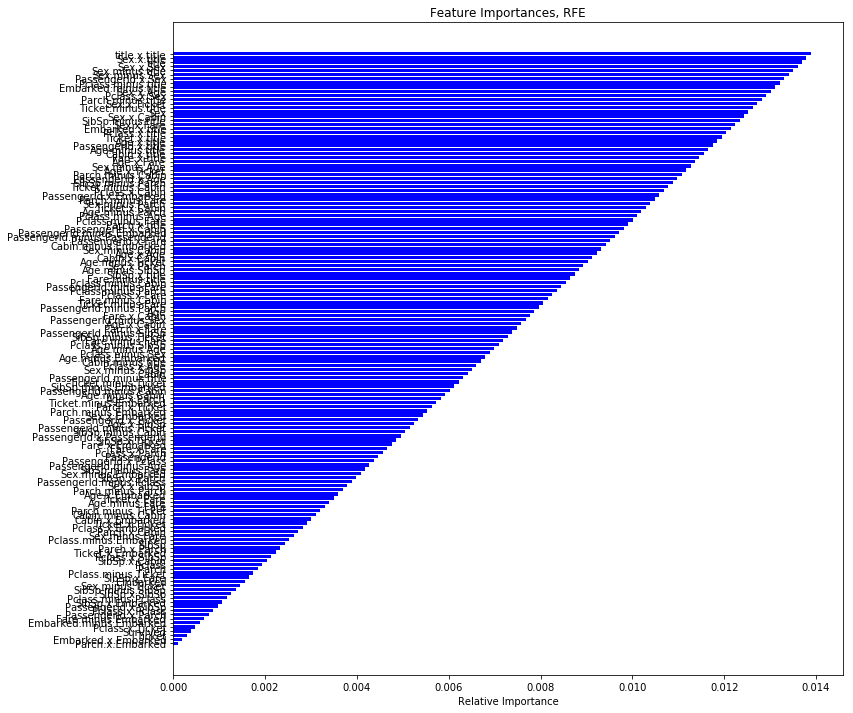

In [130]:
RFE_importance(df)

In [141]:
def RFECV_importance(dt):
	X = dt.iloc[:,:-1].values
	Y = dt.iloc[:,-1].values
	
	#~ print(X[:3])
	#~ print(Y[:3])
	
	Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.1, random_state=42)
	
	clf = RandomForestClassifier(n_estimators=10, random_state=0)
	#~ clf = tree.DecisionTreeClassifier(max_depth=10)
	#~ clf.fit(Xtr, Ytr)
	rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring='accuracy')
	rfecv.fit(X, Y)
	print("Optimal number of features : %d" % rfecv.n_features_)
	
	print(rfecv.support_)
	#~ [False  True False  True False  True  True  True  True False  True]
	
	print(rfecv.ranking_)
	#~ [5 1 4 1 3 1 1 1 1 2 1]
	
	#~ print(dt.drop(columns=['quality']).columns.values)
	
	print(dt.iloc[:, :-1].columns.values[rfecv.support_])
	
	plt.figure()
	plt.xlabel("Number of features selected")
	plt.ylabel("Cross validation score (nb of correct classifications)")
	plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
	plt.show()
	
	newcols = list(dt.iloc[:, :-1].columns.values[rfecv.support_])
	newcols.append(dt.columns.values[-1])
	
	return newcols

In [168]:
def classify(dt):
	X = dt.iloc[:,:-1].values
	Y = dt.iloc[:,-1].values
	Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.10, random_state=42)
	clf=None
	
	clas = []
	scores = []
	
	clf = RandomForestClassifier(n_estimators=50, random_state=0)
	clf.fit(Xtr, Ytr)
	clas.append("RandomForest")
	scores.append(clf.score(Xte,Yte))
	
	clf = tree.DecisionTreeClassifier(max_depth=5)
	clf.fit(Xtr, Ytr)
	clas.append("DecisionTree")
	scores.append(clf.score(Xte,Yte))
	
	clf = KNeighborsClassifier(1)
	clf.fit(Xtr, Ytr)
	clas.append("KNN(1)")
	scores.append(clf.score(Xte,Yte))
	
	clf = KNeighborsClassifier(2)
	clf.fit(Xtr, Ytr)
	clas.append("KNN(2)")
	scores.append(clf.score(Xte,Yte))
	
	clf = KNeighborsClassifier(3)
	clf.fit(Xtr, Ytr)
	clas.append("KNN(3)")
	scores.append(clf.score(Xte,Yte))
	
	clf = KNeighborsClassifier(5)
	clf.fit(Xtr, Ytr)
	clas.append("KNN(5)")
	scores.append(clf.score(Xte,Yte))
	
	clf = SVC(C=10.0)
	clf.fit(Xtr, Ytr)
	clas.append("SVC, C=10.0")
	scores.append(clf.score(Xte,Yte))
	
	clf = SVC(C=1.0)
	clf.fit(Xtr, Ytr)
	clas.append("SVC, C=1.0")
	scores.append(clf.score(Xte,Yte))
	
	clf = SVC(C=0.1)
	clf.fit(Xtr, Ytr)
	clas.append("SVC, C=0.1")
	scores.append(clf.score(Xte,Yte))
	
	clf = LogisticRegression(random_state=0, solver='lbfgs',max_iter=200)
	clf.fit(Xtr, Ytr)
	clas.append("LogisticRegression")
	scores.append(clf.score(Xte,Yte))
	
	clf = LogisticRegression(penalty='l1',random_state=0,max_iter=200)
	clf.fit(Xtr, Ytr)
	clas.append("LogisticRegression, L1")
	scores.append(clf.score(Xte,Yte))
	
	clf = LogisticRegression(penalty='l2',random_state=0, solver='lbfgs',max_iter=200)
	clf.fit(Xtr, Ytr)
	clas.append("LogisticRegression, L2")
	scores.append(clf.score(Xte,Yte))

	plt.title("Classification validation score")
	plt.barh(clas, scores, color='b', align='center')
	plt.xlabel('Relative Importance')


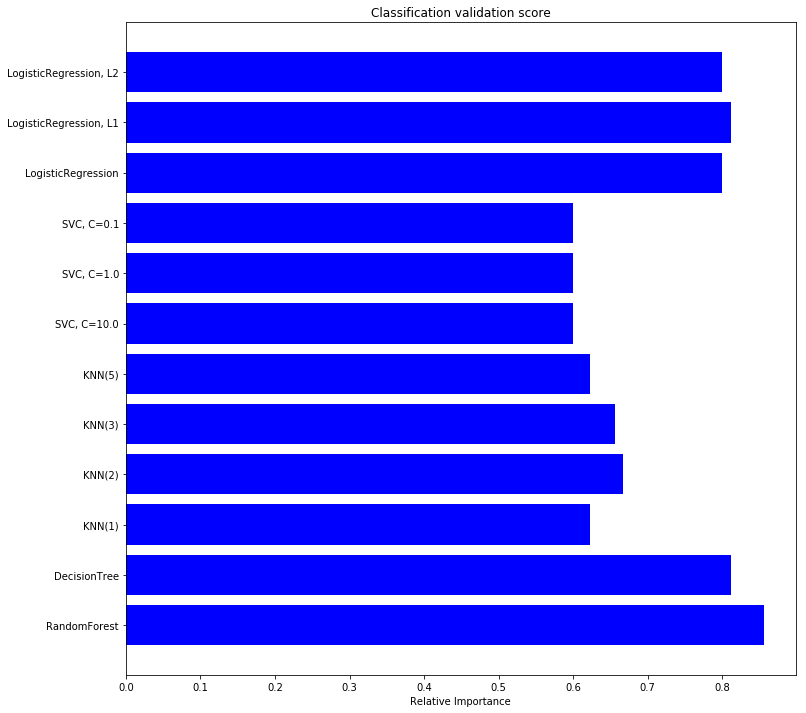

In [169]:
classify(df)

Optimal number of features : 108
[ True False False  True False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True  True  True False  True False  True  True False  True  True  True
  True  True  True  True  True False False  True  True False  True False
 False  True False  True  True  True  True False False  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False  True False  True  True  True
  True False  True  True  True False False False  True  True  True  True
  True False False False False  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False  True False False]
[ 1 30  9  1 17 25  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  

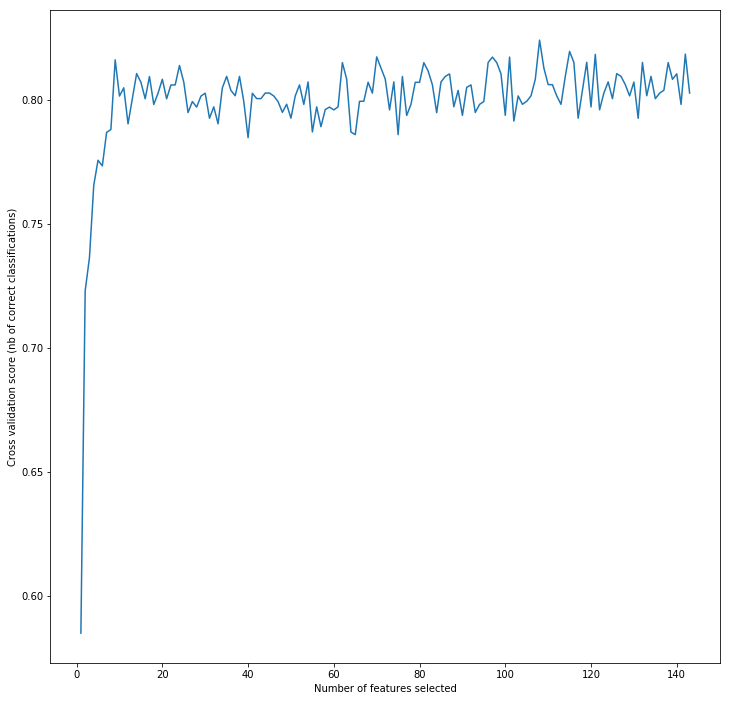

['PassengerId', 'Age', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'PassengerId.x.PassengerId', 'PassengerId.minus.PassengerId', 'PassengerId.x.Pclass', 'PassengerId.minus.Pclass', 'PassengerId.x.Sex', 'PassengerId.minus.Sex', 'PassengerId.x.Age', 'PassengerId.minus.Age', 'PassengerId.x.SibSp', 'PassengerId.minus.SibSp', 'PassengerId.x.Parch', 'PassengerId.minus.Parch', 'PassengerId.x.Ticket', 'PassengerId.minus.Ticket', 'PassengerId.x.Fare', 'PassengerId.minus.Fare', 'PassengerId.x.Cabin', 'PassengerId.minus.Cabin', 'PassengerId.x.Embarked', 'PassengerId.minus.Embarked', 'PassengerId.x.title', 'PassengerId.minus.title', 'Pclass.x.Pclass', 'Pclass.minus.Pclass', 'Pclass.minus.Sex', 'Pclass.x.Age', 'Pclass.minus.Age', 'Pclass.minus.SibSp', 'Pclass.minus.Parch', 'Pclass.x.Ticket', 'Pclass.x.Fare', 'Pclass.minus.Fare', 'Pclass.x.Cabin', 'Pclass.minus.Cabin', 'Pclass.x.Embarked', 'Pclass.minus.Embarked', 'Pclass.x.title', 'Pclass.minus.title', 'Sex.x.Age', 'Sex.minus.Age', 'Sex.minus.S

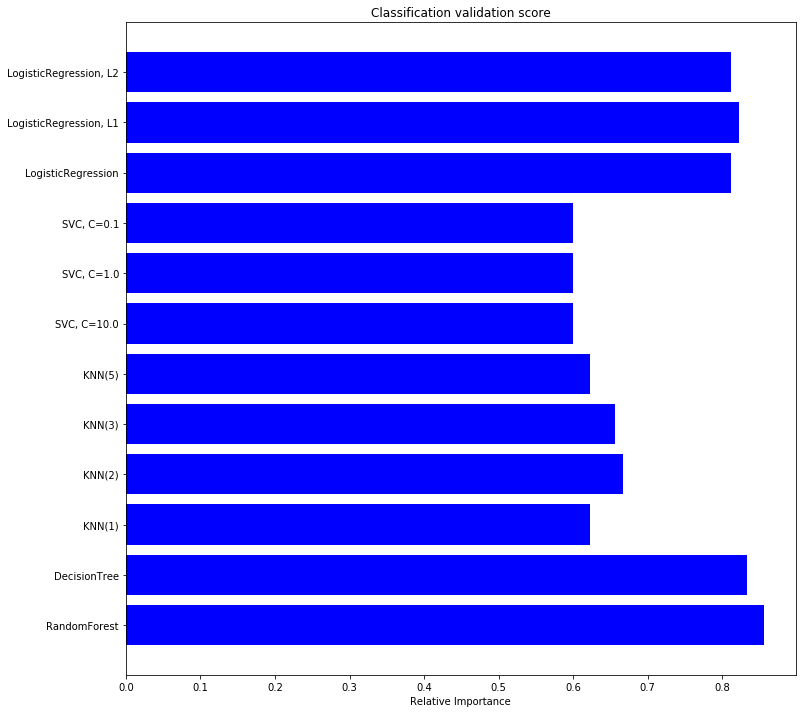

In [144]:
cols = RFECV_importance(df)
print(cols)
df=df[cols]

classify(df)

In [83]:
def LR(dt):
	X = dt.iloc[:,:-1].values
	Y = dt.iloc[:,-1].values
	Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.1, random_state=42)
	clf=None
	clf = LogisticRegression(penalty='l1',C=1.0, random_state=0,max_iter=100)
	clf.fit(Xtr, Ytr)
	print("feature importances(LR): ", clf.coef_)
	plt.bar(dt.iloc[:,:-1].columns.values, clf.coef_[0])

feature importances(LR):  [[ 0.00000000e+00  0.00000000e+00  1.12223355e-05  0.00000000e+00
   0.00000000e+00  1.19550636e-04 -2.30938656e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.69602911e-04  0.00000000e+00 -3.75081791e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.76737727e-03  0.00000000e+00 -6.56844505e-03
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.96826007e-05  0.00000000e+00
   0.00000000e+00  2.69904728e-04 -8.32804779e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.23806631e-03  0.00000000e+00 -2.12542509e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.60715510e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.56676631e-05 -2.45851646e-04
   3.56343628e-03  3.06691739e-04 -3.75673006e-03  0.00000000e+00
   0.0000000

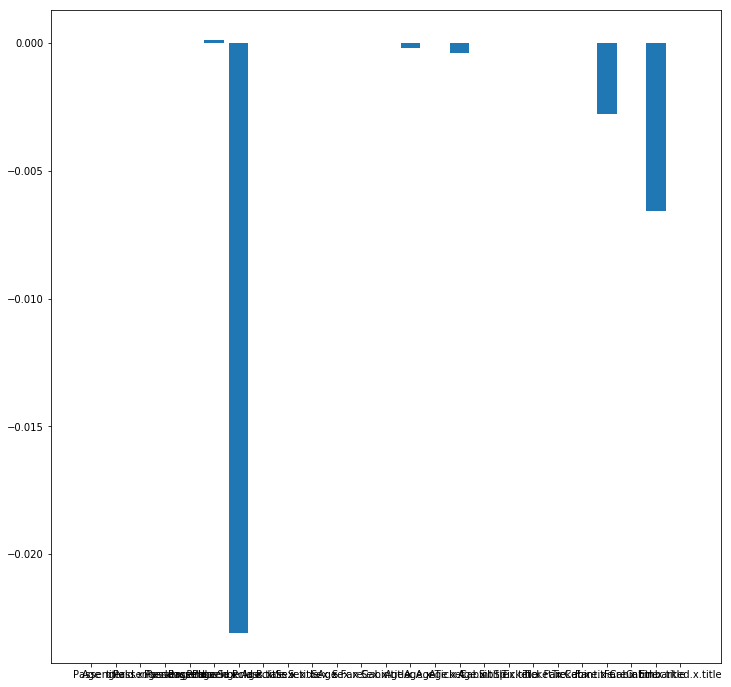

In [84]:
LR(df)

In [85]:
import copy
def FFS(dt):

	col = dt.columns.values
	
	selected = []
	
	for k in range(0, len(col)-1):
		maxidx = -1
		maxscore = -1
		for i in range(0,len(col)-1):
			#~ print(col[i])
			if not (i in selected):
				newsel = copy.deepcopy(selected)
				newsel.append(i)
				#~ print(newsel)
				newsel.append(len(col)-1)
				
				
				st=dt[col[newsel]]
				
				#~ print(st.head(2))
				
				X = st.iloc[:,:-1].values
				Y = st.iloc[:,-1].values
				
				Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.1, random_state=42)
				
				rfe = RandomForestClassifier(n_estimators=50, random_state=0)
				#~ rfe = KNeighborsClassifier(5)
				rfe.fit(Xtr, Ytr)
				
				score = rfe.score(Xte,Yte)
				
				if score >= maxscore:
					#~ print(score,maxscore,i)
					maxscore=score
					maxidx=i
		
		#~ if not maxidx in selected:
		if not (maxidx in selected):
			selected.append(maxidx)
			print("RF score: {}, \n\tfeatures:{}, \n\ttheir names:{}\n".format(maxscore, selected, col[selected]))
	return selected


In [ ]:
cols=FFS(df)

RF score: 0.8111111111111111, 
	features:[145], 
	their names:['SibSp.plus.title']

RF score: 0.8555555555555555, 
	features:[145, 72], 
	their names:['SibSp.plus.title' 'Pclass.minus.title']

RF score: 0.8777777777777778, 
	features:[145, 72, 112], 
	their names:['SibSp.plus.title' 'Pclass.minus.title' 'Age.plus.Ticket']

RF score: 0.9, 
	features:[145, 72, 112, 83], 
	their names:['SibSp.plus.title' 'Pclass.minus.title' 'Age.plus.Ticket' 'Sex.x.Parch']

RF score: 0.8888888888888888, 
	features:[145, 72, 112, 83, 162], 
	their names:['SibSp.plus.title' 'Pclass.minus.title' 'Age.plus.Ticket' 'Sex.x.Parch'
 'Parch.minus.title']

RF score: 0.9, 
	features:[145, 72, 112, 83, 162, 137], 
	their names:['SibSp.plus.title' 'Pclass.minus.title' 'Age.plus.Ticket' 'Sex.x.Parch'
 'Parch.minus.title' 'SibSp.x.Cabin']

RF score: 0.9111111111111111, 
	features:[145, 72, 112, 83, 162, 137, 38], 
	their names:['SibSp.plus.title' 'Pclass.minus.title' 'Age.plus.Ticket' 'Sex.x.Parch'
 'Parch.minus.title'

RF score: 0.9222222222222223, 
	features:[145, 72, 112, 83, 162, 137, 38, 116, 106, 131, 121, 34, 158, 85, 110, 51, 71, 157, 25, 103, 143, 54, 118, 174, 160], 
	their names:['SibSp.plus.title' 'Pclass.minus.title' 'Age.plus.Ticket' 'Sex.x.Parch'
 'Parch.minus.title' 'SibSp.x.Cabin' 'PassengerId.x.Embarked'
 'Age.x.Cabin' 'Age.plus.SibSp' 'SibSp.x.Ticket' 'Age.plus.Embarked'
 'PassengerId.plus.Fare' 'Parch.x.Embarked' 'Sex.plus.Parch'
 'Age.x.Ticket' 'Pclass.minus.Age' 'Pclass.x.title' 'Parch.plus.Cabin'
 'PassengerId.plus.SibSp' 'Age.plus.Age' 'SibSp.x.title'
 'Pclass.minus.SibSp' 'Age.plus.Cabin' 'Ticket.minus.Embarked'
 'Parch.plus.Embarked']



In [5]:
df2=df.iloc[:,[145, 72, 112, 83, 162, 137, 38, 116, 106, 131, 121, 34, 158, 85, 110, 51, 71, 157]]

In [6]:
df3=df

In [7]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

def ROC(model, dataframe, lab):

    X = dataframe.drop('Survived',axis=1).values
    Y = dataframe['Survived'].values

    #классифицируем
    Xtr, Xte, Ytr, Yte = train_test_split(X, Y, test_size=0.1, random_state=42)

    clf = model #LogisticRegression(random_state=0, solver='lbfgs')
    clf.fit(Xtr, Ytr)

    #получаем вероятности
    Ypr = clf.predict_proba(Xte)[:,1]

    #получаем значения FPR, TPR
    fpr, tpr, thresholds = metrics.roc_curve(Yte, Ypr)


    import matplotlib.pyplot as plt
    #plt.plot([0, 1], [0, 1],'r--', label='50% accuracy, bad classifier')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    #plt.title('AUC = {:4.2f}'.format(metrics.auc(fpr,tpr)))
    plt.plot(fpr,tpr, label=lab+' (AUC={:4.2f})'.format(metrics.auc(fpr,tpr)))
    #plt.show()

In [8]:
df3.head(7)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Embarked.x.Embarked,Embarked.minus.Embarked,Embarked.plus.Embarked,Embarked.x.title,Embarked.minus.title,Embarked.plus.title,title.x.title,title.minus.title,title.plus.title,Survived
0,1,3,1,22.0,1,0,0,7.2500,94,2,...,4,0,4,22,-9,13,121,0,22,0
1,2,1,0,38.0,1,0,5,71.2833,81,0,...,0,0,0,0,-12,12,144,0,24,1
2,3,3,0,26.0,0,0,7,7.9250,141,2,...,4,0,4,16,-6,10,64,0,16,1
3,4,1,0,35.0,1,0,6,53.1000,55,2,...,4,0,4,24,-10,14,144,0,24,1
4,5,3,1,35.0,0,0,7,8.0500,96,2,...,4,0,4,22,-9,13,121,0,22,0
5,6,3,1,30.0,0,0,7,8.4583,58,1,...,1,0,2,11,-10,12,121,0,22,0
6,7,1,1,54.0,0,0,6,51.8625,129,2,...,4,0,4,22,-9,13,121,0,22,0


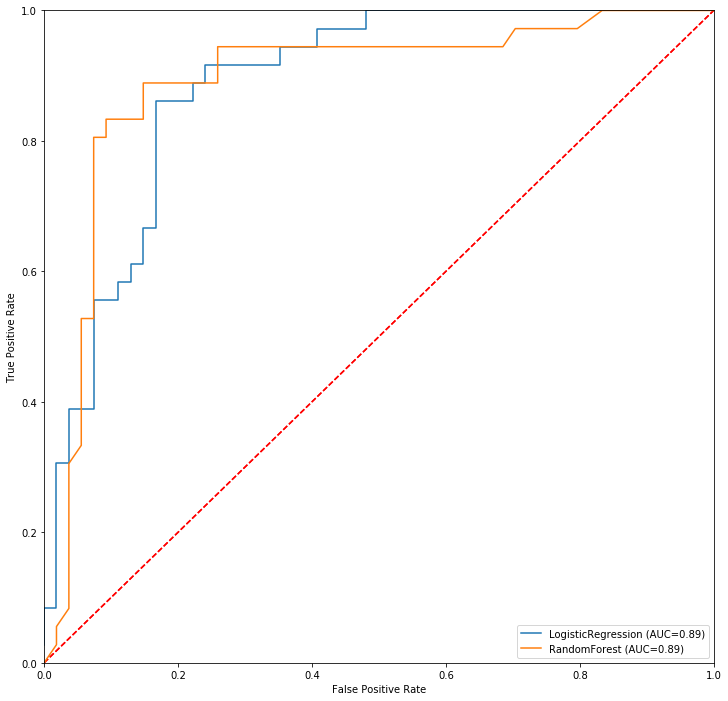

In [10]:
ROC(LogisticRegression(random_state=0, solver='lbfgs'),df3,'LogisticRegression')
ROC(RandomForestClassifier(n_estimators=150, random_state=0),df3,'RandomForest')
plt.legend(loc = 'lower right')